# Last time... 

## random.rand vs random.random

In [1]:
import numpy as np

In [55]:
np.random.rand(3,2)

array([[0.26088933, 0.31652959],
       [0.68344772, 0.17272344],
       [0.75880029, 0.32245006]])

In [53]:
np.random.random((3,2))
                

array([[0.62638855, 0.91179713],
       [0.37904422, 0.72639318],
       [0.5580534 , 0.12959705]])

> There are historical reasons for these, probably related to making the transition to Python+Numpy easier for Matlab programmers (c.f. Matlab's rand). Cleaning it up might cause more trouble than it is worth, because there is likely a lot of existing code that uses the different versions of the functions.

## np.percentile

> Given a vector ``V`` of length ``N``, the q-th percentile of
``V`` is the value ``q/100`` of the way from the minimum to the
maximum in a sorted copy of ``V``. The values and distances of
the two nearest neighbors as well as the `interpolation` parameter
will determine the percentile if the normalized ranking does not
match the location of ``q`` exactly. 

In [7]:
x = np.arange(101)
np.percentile(x,25)

25.0

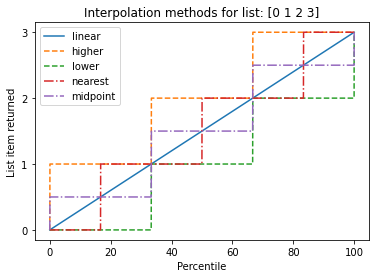

In [8]:
import matplotlib.pyplot as plt

a = np.arange(4)
p = np.linspace(0, 100, 6001)
ax = plt.gca()
lines = [
    ('linear', None),
    ('higher', '--'),
    ('lower', '--'),
    ('nearest', '-.'),
    ('midpoint', '-.'),
]
for interpolation, style in lines:
    ax.plot(
        p, np.percentile(a, p, interpolation=interpolation),
        label=interpolation, linestyle=style)
ax.set(
    title='Interpolation methods for list: ' + str(a),
    xlabel='Percentile',
    ylabel='List item returned',
    yticks=a)
ax.legend()
plt.show()

In [ ]:
x = np.array([13, 15, 17, 20, 21, 32, 34, 36, 39, 46, 49])

In [ ]:
x.sort()
x

In [ ]:
y = np.linspace(0,100,101)

In [ ]:
z = np.percentile(x, y, interpolation='lower')

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y,z)

In [ ]:
{i:z[i] for i in range(len(z))}

From documentation:

In [ ]:
import inspect
np.percentile??

# Recap: aggregation

We have a simulated housing data, and we want to investigate into this fake dataset

In [25]:
LOWSQFT = 1200
HIGHSQFT = 2500
SQFT_VAR = 200
PRICE_MEAN = 0
PRICE_VAR = 20000

PRICE_PER_SQFT = 740
PER_VAR = 60

low = np.random.normal(LOWSQFT, SQFT_VAR, 80)
lowPrice = low * np.random.normal(PRICE_PER_SQFT,PER_VAR,80)+ np.random.normal(PRICE_MEAN, PRICE_VAR, 80)
high = np.random.normal(HIGHSQFT, SQFT_VAR, 20)
highPrice = high * np.random.normal(PRICE_PER_SQFT,PER_VAR,20) + np.random.normal(PRICE_MEAN, PRICE_VAR, 20)

sqft = np.hstack([low,high])
price = np.hstack([lowPrice, highPrice])

housingData = np.hstack([sqft, price])

In [26]:
sqft = sqft.reshape((100,1))
price = price.reshape((100,1))
housingData = np.hstack([sqft, price])

In [27]:
housingData.shape

(100, 2)

Text(0, 0.5, 'Price ($100000)')

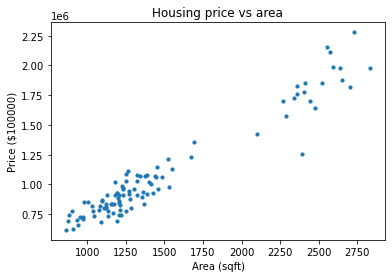

In [28]:
import matplotlib.pyplot as plt
plt.scatter(sqft, price,s=10)
plt.title("Housing price vs area")
plt.xlabel("Area (sqft)")
plt.ylabel("Price ($100000)")

# sqft, price,s=10


In [ ]:
# Q1: what is the average price of houses in this neighborhood?

# Q2: what is the average size of houses in this neighborhood?

# Q3: what is the average $/sqft for houses in this neighborhood?

# Introducing Broadcasting

Broadcasting is a set of rules for applying binary ufuncs on array of **different** sizes

In [ ]:
import numpy as np

In [29]:
a = np.array([0,1,2])
b = np.array([5,5,5])
a + b

array([5, 6, 7])

In [30]:
a.shape

(3,)

In [31]:
# with broadcasting, operation can be performed on array of different sizes
a + 5 

array([5, 6, 7])

We can think of this as an operation that **stretches or duplicates** the value of 5 into the array and addes the results, even though that duplication does not actually take place.

In [32]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [33]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the 1d array *a* is stretched, or broadcast across the first dimension in order to match the shape of M

In [34]:
a = np.arange(3).reshape((1,-1))

# here, np.newaxis expand the number of dimension by one
b = np.arange(3)[:, np.newaxis] # equavalent to b = b.reshape((-1,1))

In [35]:
print(a)
print(b)

[[0 1 2]]
[[0]
 [1]
 [2]]


In [37]:
print(a.shape)
print(b.shape)

(1, 3)
(3, 1)


In [38]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

# Rules of Broadcasting

1. If the two array differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side
2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape 
3. If in any dimension the sizes disagree and neither is equal tto 1, an error is raised

## Broadcasting example 1

In [40]:
M = np.ones((2,3))
a = np.arange(3)

In [41]:
print(M.shape)
print(a.shape)

(2, 3)
(3,)


By rule 1, we see that array `a` has fewer dimensions, so we pad it on the left with ones:

* M.shape -> (2,3)
* a.shape -> (1,3)

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

* M.shape -> (2,3)
* a.shape -> (2,3)

The shape match, and we see that the final shape will be (2,3)

In [42]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

## Broadcasting example 2

In [43]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)

a.shape = (3,1)-> (3,1) -> (3,3)  
b.shape = (3,) -> (1,3) -> (3,3)

In [44]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting example 3

In [50]:
M = np.ones((4,3))
a = np.arange(6).reshape((2,3))

What are the shapes of M and a in the broadcasting process?  
M.shape -> (3,2) -> (3,2) -> (3,2)  
a.shape -> (3, ) -> (1,3) -> (3,3)

In [51]:
M + a

ValueError: operands could not be broadcast together with shapes (4,3) (2,3) 

**Question:** How would you reshape M or a so that the broadcasting turns out the way you want it to be? 

## Reshape via np.newaxis

In [ ]:
x = np.array([1,2,3])
x.reshape((1,3))

In [ ]:
x[np.newaxis, :]

In [ ]:
x.reshape((3,1))

In [ ]:
x[:,np.newaxis]

`logaddexp(a,b)` computes `log(exp(a) + exp(b))` with more precision

In [ ]:
np.logaddexp(M, a[:, np.newaxis])

# Broadcasting in Practice

## Centering an array

In [ ]:
X = np.random.random((10,3))

In [ ]:
Xmean = X.mean(0) 
Xmean 

In [ ]:
X_centered = X - Xmean

In [ ]:
X_centered

In [ ]:
X_centered.mean(0)

## Plotting a two-dimensional function

In [ ]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]

In [ ]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(z, origin='lower', extent=[0,5,0,5], cmap='viridis')
plt.colorbar()